# Algoritmos de optimización - Reto 2

**Nombre:** Edgar Daniel Basurto Cruz <br>
**Github:** <br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

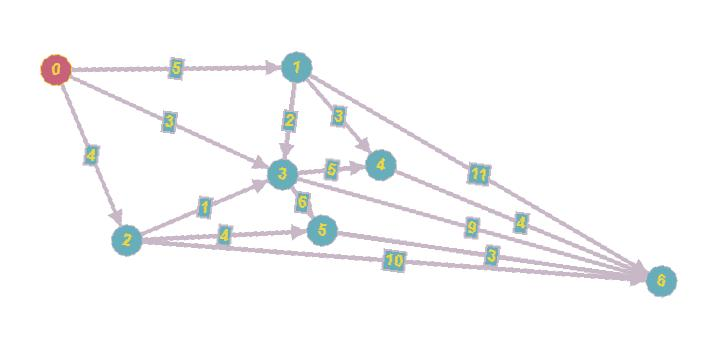

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [5]:
#Viaje por el rio - Programación dinámica
################################################################################

# Definir la matriz de costos basada en la imagen del grafo
# Nodos del 0 al 6 y los costos de las aristas extraídos de la imagen

import numpy as np

# Número de nodos
n = 7

# Inicializar matriz de costos con infinito (representando que no hay conexión directa)
costos = np.full((n, n), np.inf)

# Autoconexión con costo 0
np.fill_diagonal(costos, 0)

# Agregar costos basados en la imagen
edges = [
    (0, 1, 5), (0, 2, 4), (0, 3, 3),  # Desde nodo 0
    (1, 3, 2), (1, 4, 3),             # Desde nodo 1
    (2, 3, 1), (2, 5, 4),             # Desde nodo 2
    (3, 4, 5), (3, 5, 6),             # Desde nodo 3
    (4, 6, 11),                        # Desde nodo 4
    (5, 6, 10), (5, 4, 9), (5, 6, 3)   # Desde nodo 5
]

# Llenar la matriz con los costos extraídos de la imagen
for i, j, cost in edges:
    costos[i, j] = cost

# Aplicar algoritmo de Bellman-Ford para encontrar el camino más corto desde 0 hasta 6
def bellman_ford(costos, origen, destino):
    n = costos.shape[0]
    dist = np.full(n, np.inf)  # Inicializar distancias con infinito
    dist[origen] = 0  # Distancia al nodo origen es 0
    predecesor = np.full(n, -1)  # Para reconstruir el camino

    # Relajar las aristas hasta (n-1) veces
    for _ in range(n - 1):
        for u, v, w in edges:
            if dist[u] + w < dist[v]:  # Si se encuentra un camino más corto
                dist[v] = dist[u] + w
                predecesor[v] = u

    # Reconstruir el camino más corto
    camino = []
    nodo = destino
    while nodo != -1:
        camino.append(nodo)
        nodo = predecesor[nodo]
    
    camino.reverse()

    return dist[destino], camino

# Resolver el problema para encontrar la ruta más barata de 0 a 6
costo_minimo, ruta_optima = bellman_ford(costos, 0, 6)

# Mostrar los resultados
costo_minimo, ruta_optima



(11.0, [0, 2, 5, 6])

## Descenso del gradiente

In [7]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [9]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

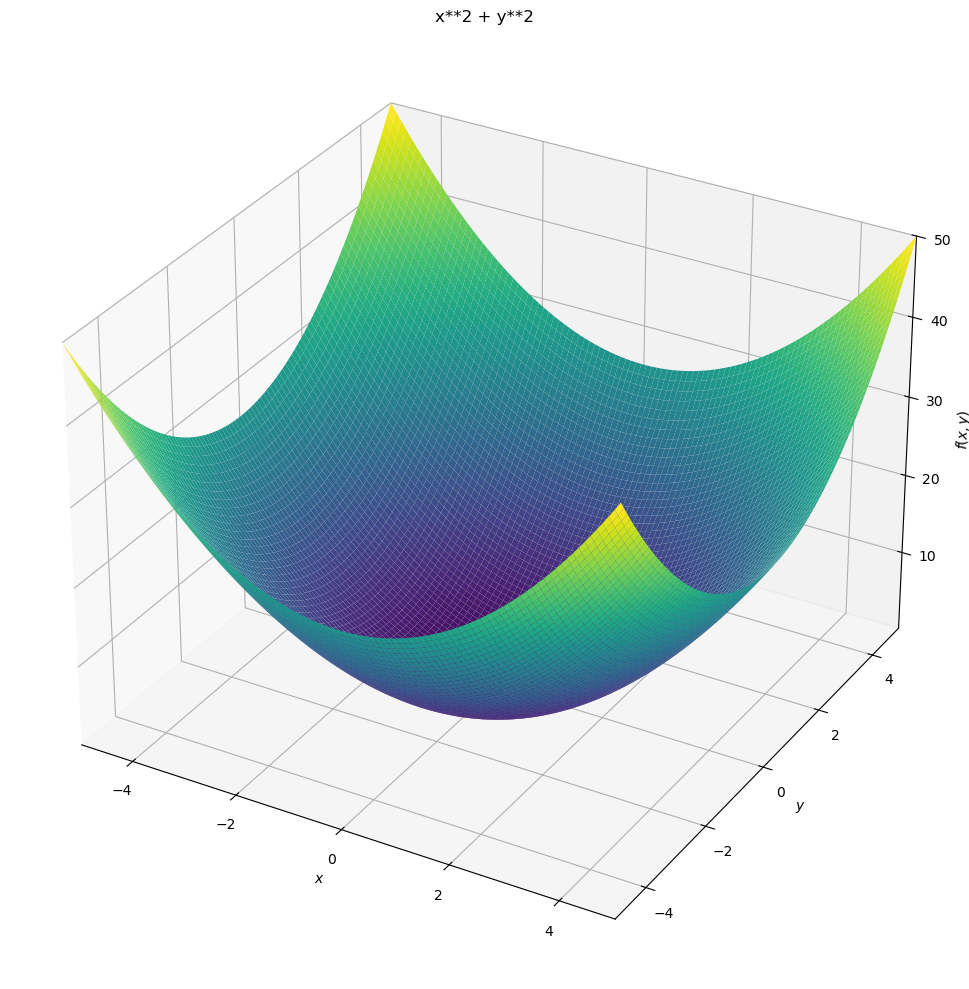

In [11]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

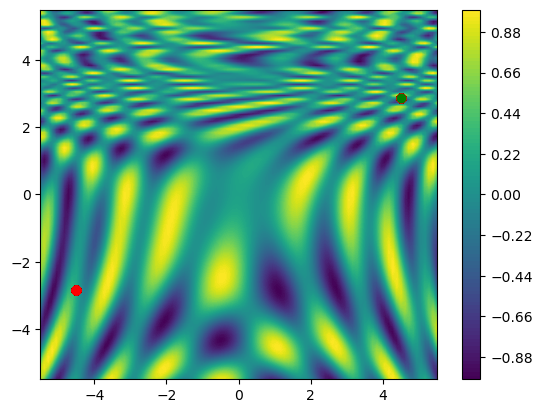

Solucion: [4.509198372992087, 2.857062989412076] -0.44202301374914893


In [19]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
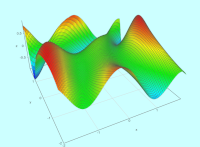


In [24]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


In [26]:
import numpy as np

# Definir la función objetivo
def f(X):
    return np.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.exp(X[1]))

# Definir el gradiente de la función
def grad_f(X):
    x, y = X
    df_dx = (x * np.cos(2 * x - np.exp(y) + 1) * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) - 
             2 * np.sin(2 * x - np.exp(y) + 1) * np.sin(0.5 * x**2 - 0.25 * y**2 + 3))
    df_dy = (-0.5 * y * np.cos(2 * x - np.exp(y) + 1) * np.cos(0.5 * x**2 - 0.25 * y**2 + 3) + 
             np.exp(y) * np.sin(2 * x - np.exp(y) + 1) * np.sin(0.5 * x**2 - 0.25 * y**2 + 3))
    return np.array([df_dx, df_dy])

# Implementar el descenso del gradiente
def gradient_descent(f, grad_f, lr=0.01, tol=1e-6, max_iter=1000):
    X = np.random.uniform(-2, 2, 2)  # Punto inicial aleatorio
    for _ in range(max_iter):
        grad = grad_f(X)  # Calcular el gradiente
        X_new = X - lr * grad  # Actualizar el punto
        if np.linalg.norm(X_new - X) < tol:  # Condición de convergencia
            break
        X = X_new

    return X, f(X)

# Ejecutar el algoritmo
x_min, f_min = gradient_descent(f, grad_f)

# Mostrar los resultados
x_min, f_min

(array([ 1.09962909, -2.85217992]), -0.9999999966096863)